In [36]:
# Dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [37]:
# Copy the file path to reading 

file = Path(r'Source\adult.csv')

In [38]:
# Reading the CSV file in to the Pandas DataFrame 
df = pd.read_csv(file)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [39]:
df['income_binary'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1) 
df.head(2000)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,45,Private,148171,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,40,United-States,>50K,1
1996,30,Private,196385,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,35,United-States,>50K,1
1997,40,Self-emp-inc,191429,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K,1
1998,49,Self-emp-inc,58359,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K,1


In [40]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'income_binary'],
      dtype='object')

In [41]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_binary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


x = df[['age']]  
y = df['income_binary']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
 
model = LinearRegression()
model.fit(x_train, y_train)

group7_predictions = model.predict(x_test)


x_test = x_test.reset_index(drop=True)

df_subset = df.loc[x_test.index]

dataframe = pd.DataFrame(group7_predictions, columns=['income_binary_prediction'], index=df_subset.index)

predict_val = df_subset.join(dataframe)

predict_val.head(2000)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary,income_binary_prediction
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,0.129997
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0.204482
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,0.085307
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0.278967
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0.152343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,45,Private,148171,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,40,United-States,>50K,1,0.152343
1996,30,Private,196385,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,35,United-States,>50K,1,0.442833
1997,40,Self-emp-inc,191429,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K,1,0.226827
1998,49,Self-emp-inc,58359,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K,1,0.092755


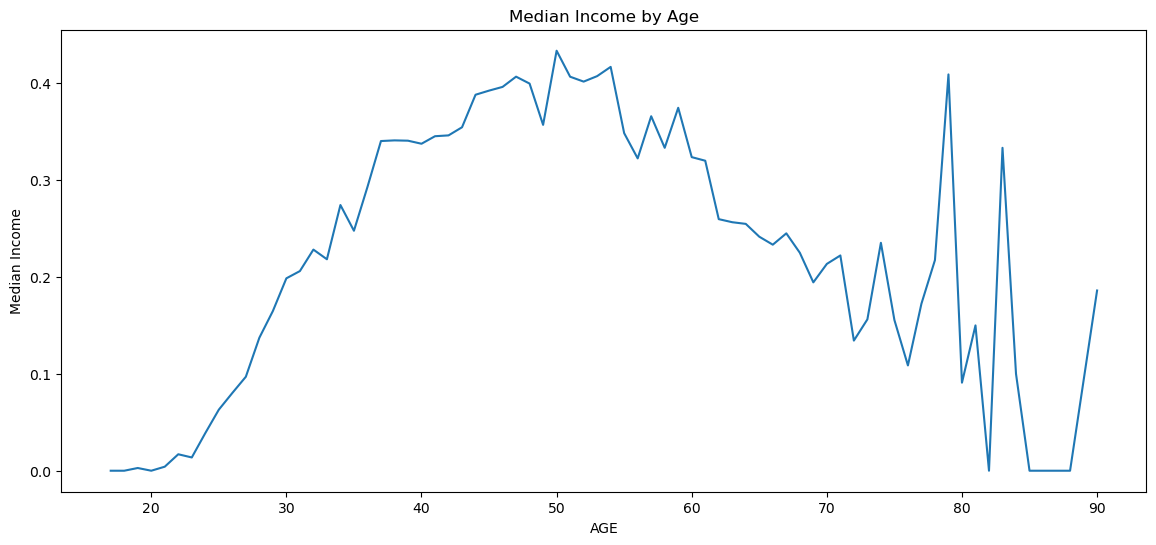

In [46]:
# Allows for the average income for different age groups
avg = df.groupby('age')['income_binary'].mean()

x = avg.index
y = avg.values

plt.figure(figsize=(14, 6))
sns.lineplot(x=avg.index, y=avg.values)
plt.xlabel('AGE')
plt.ylabel('Median Income')
plt.title('Median Income by Age')
plt.show()

In [ ]:
# # Drop all rows with missing information
# df = df.dropna(how='any')

In [ ]:
# # Verify dropped rows
# df.count()

In [ ]:
# # The Zip column is the wrong data type. It should be a string (object).
# df.dtypes

In [ ]:
# # Use df.astype() method to convert the datatype of the Zip column
# df = df.astype({"Zip": str}, errors='raise')

In [ ]:
# # Verify that the Zip column datatype has been made an object
# df['Zip'].dtype

In [ ]:
# # Display an overview of the Employers column
# df['Employer'].value_counts()

In [ ]:
# # Clean up Employer category. Replace 'SELF' and 'SELF EMPLOYED' with 'SELF-EMPLOYED'
# df['Employer'] = df['Employer'].replace({'SELF': 'SELF-EMPLOYED', 'SELF EMPLOYED': 'SELF-EMPLOYED'})

In [ ]:
# # Verify clean-up.
# df['Employer'].value_counts()

In [ ]:
# # Clean up Employer category. Replace 'NOT EMPLOYED' with 'UNEMPLOYED'
# df['Employer'] = df['Employer'].replace({'NOT EMPLOYED': 'UNEMPLOYED'})
# df['Employer'].value_counts()

In [ ]:
# # Display a statistical overview
# # We can infer the maximum allowable individual contribution from 'max'
# df.describe()

In [ ]:
# # Save the DataFrame to a CSV file. 
# df.to_csv("Resources/donors2021.csv", index=False, encoding="ISO-8859-1")